# Explainability for the Credit Risk Analysis

### Importing Libraries

In [1]:
import shap
import joblib
import pandas as pd
import matplotlib.pyplot as plt

/Users/elbethelzewdie/Downloads/credit-risk-analysis/Credit-risk-analysis/week12/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load trained model

In [2]:
model = joblib.load("/Users/elbethelzewdie/Downloads/credit-risk-analysis/Credit-risk-analysis/model/LogisticRegression_best_model1.pkl")

In [3]:
df = pd.read_csv("/Users/elbethelzewdie/Downloads/credit-risk-analysis/Credit-risk-analysis/data/processed/final_dataset_new.csv")
X = df.drop(columns=["is_high_risk", "CustomerId"])

### For Logistic Regression

In [4]:
explainer = shap.LinearExplainer(model, X)
shap_values = explainer.shap_values(X)

### Global Explainability (Feature Importance)

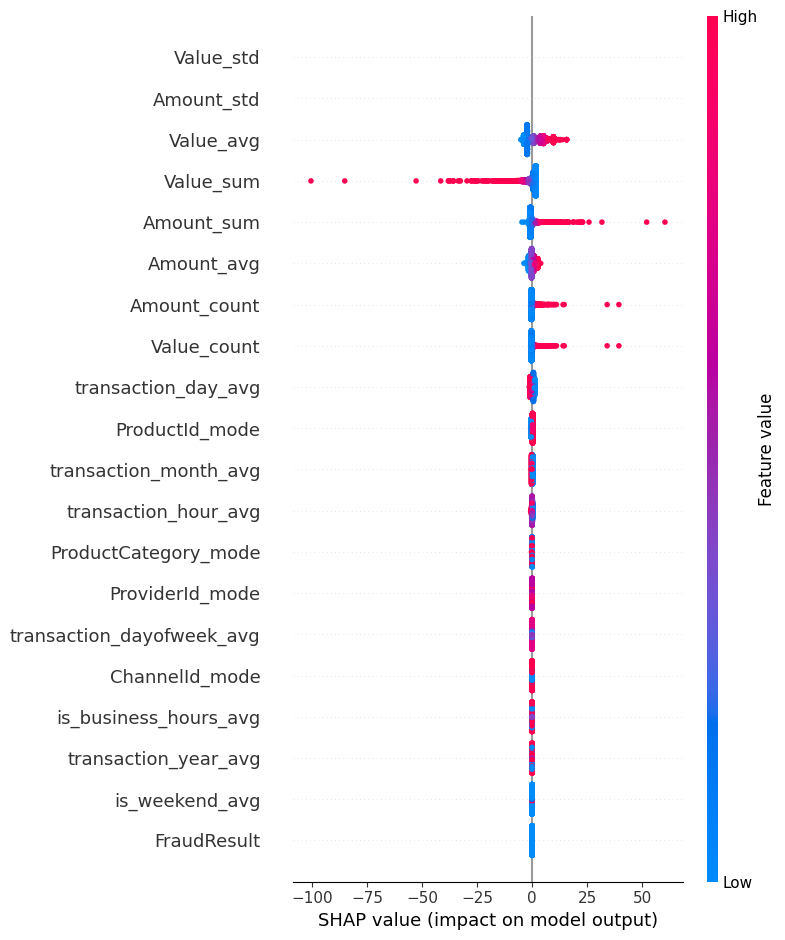

In [5]:
shap.summary_plot(shap_values, X)

### Bar Plot Version

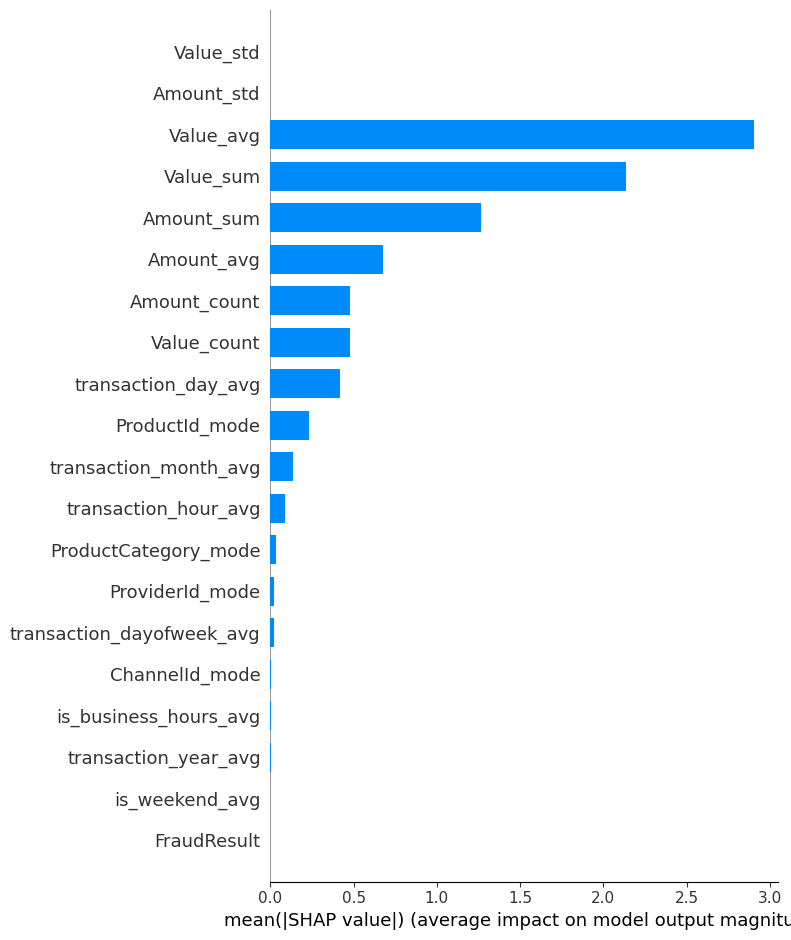

In [6]:
shap.summary_plot(shap_values, X, plot_type="bar")


### Analysis

- The SHAP analysis reveals that aggregated transaction features, specifically Value_std and Amount_std, have the most significant impact on the model's output, indicating that variability in transaction patterns is a key driver for credit risk assessment. While features like Value_avg and Value_sum also contribute notably, their influence is considerably lower than the standard deviation measures. Several temporal features, such as transaction_day_avg and transaction_hour_avg, show a moderate impact, suggesting that the timing of transactions plays a role in determining risk. Interestingly, static identifiers like ProductId_mode and ProviderId_mode have a relatively low impact, while negative SHAP values for features like is_weekend_avg and FraudResult indicate they push the model towards a lower risk prediction. Overall, the model prioritizes behavioral and statistical patterns in transaction history over static categorical information.